# Generation of an inclusion/exclusion flowchart

Inclusion and exclusion flowcharts are one of the key figure to generate when doing medical research. We provide a class to help you in this task.  
To summarize, you can sequentialy add **criteria** to the flowchart, by providing 

- A description of the criterion
- Which patients check the criterion

To make the use of this class easier, each criterion can be build independently. The **order** will be determined by **how you add the criteria** to the flowchart. At this step, criteria will be combined to output a corrrect flowchart. Counting (*`n=...`*) is done automatically !

## The input data

Data can be provided in two forms: **DataFrame** form or **Dictionary** form.

=== "**DataFrame** form"

    In this case, `data` is provided as a unique `DataFrame`. One column (by default `person_id`)
    stores the ids that constitutes the initial cohort. A criterion, it this case, will be defined as a boolean column,
    where each row is either accepted or rejected. For instance:


    ```python
    data = pd.DataFrame(
        dict(
            person_id=list(range(10)),
            over_18=5*[True] + 5*[False],
            diabetes=[True, False, True, False, True, False, True, False, True, False],
            infarction=[True, True, False, False, True, True, False, False, True, True],
            final_split=[True] + 9*[False],
        )
    )
    ```


=== "**Dictionary** form"

    In this case, `data` is provided as dictionary. Keys represent criteria names, and values
    contains the ids constituting the passing cohort. Those ids can be in the form of any iterable
    (list, set, Series, ...). **The initial cohort should be provided under the `initial` key**.
    For instance:

    ```python
    data = dict(
        initial = list(range(10)),
        over_18 = [0,1,2,3,4],
        diabetes=[0,2,4,6,8],
        infarction=[0,1,4,5,8,9],
        final_split=[0],
    )
    ```

## A step-by-step example

Let us suppose we have a small cohort of 10 patients. From this cohort, we want to select patients with three consecutive criteria:

- Patients should be at least 18 years old.
- Patients should have Type I or Type II diabetes.
- Patients should've had at least one infarction event.

!!! tip "On having multiple criteria"
     On advantage of this flowchart generation is that it will handle multiple criteria by itself, by computing intersection iteratively

In [ ]:
import pandas as pd
from eds_scikit.utils.flowchart import Flowchart

So let us describe our initial cohort in the **DataFrame** form

In [2]:
from eds_scikit.utils.flowchart import Flowchart

data = pd.DataFrame(
    dict(
        person_id=list(range(10)),
        over_18=5*[True] + 5*[False],
        diabetes=[True, False, True, False, True, False, True, False, True, False],
        infarction=[True, True, False, False, True, True, False, False, True, True],
        final_split=[True] + 9*[False],
    )
)

We added an extra `final_split` column that can, for instance, occur when splitting a cohort into a **training** and a **testing** subcohorts. This will result in a **split** in the flowchart (see below).

Here we instantiate the Flowchart with the initial cohort:

In [19]:

F = Flowchart(
    data=data,
    initial_description="Initial population",
)

And we add each criterion with the `add_criterion` method:

In [20]:

F.add_criterion(
    description="Patients over 18 y.o.",
    excluded_description="",
    criterion_name="over_18",
)

F.add_criterion(
    description="With Type I or II diabetes",
    excluded_description="",
    criterion_name="diabetes",
)

F.add_criterion(
    description="With infarction",
    excluded_description="",
    criterion_name="infarction",
)

This `add_criterion` method expects 3 parameters:

- `description` : The description to add in the corresponding flowchart's box
- `excluded_description` : The description to add in the **excluded** box of the flowchart
- `criterion_name` : 
  
    - **DataFrame form**: The column name of the `data` object that contains boolean values to discriminate between rows that checks the criterion and rows that doesn't
    - **Dictionary form**: The key of the dictionary containing the ids of the passing cohort

If you need to do a final split in your flowchart, you can via the dedicated method:

In [21]:
F.add_final_split(
    left_description = "",
    right_description = "",
    criterion_name = "final_split",
    left_title="Cohort 1",
    right_title="Cohort 2",
)

At this point, we are ready to generate the flowchart.  
Just run the following snippet:

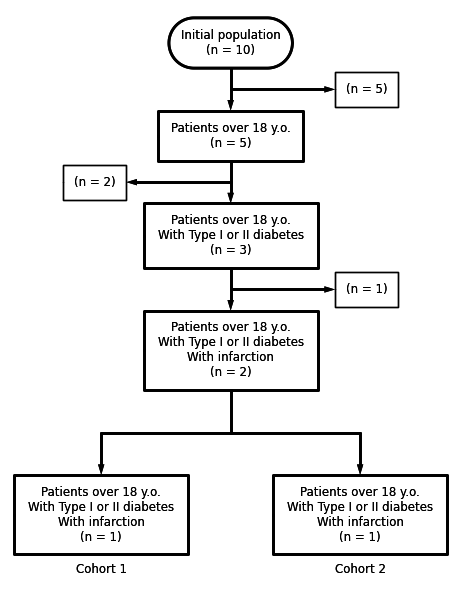

In [22]:
F.generate_flowchart(alternate=True)

Finally, you can save your flowchart (in `".png"` or `".svg"`):

In [7]:
F.save("my_flowchart.png")

For more details, you can check the [code reference][eds_scikit.utils.flowchart.flowchart.Flowchart] of the `Flowchart` object.